In [1]:
# Commented out IPython magic to ensure Python compatibility.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
# %matplotlib inline

# Commented out IPython magic to ensure Python compatibility.
import sklearn
import random

from sklearn.utils import shuffle
# %matplotlib inline

C:\Users\zchir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zchir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


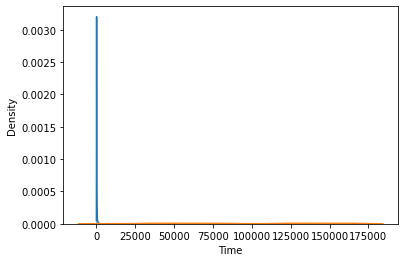

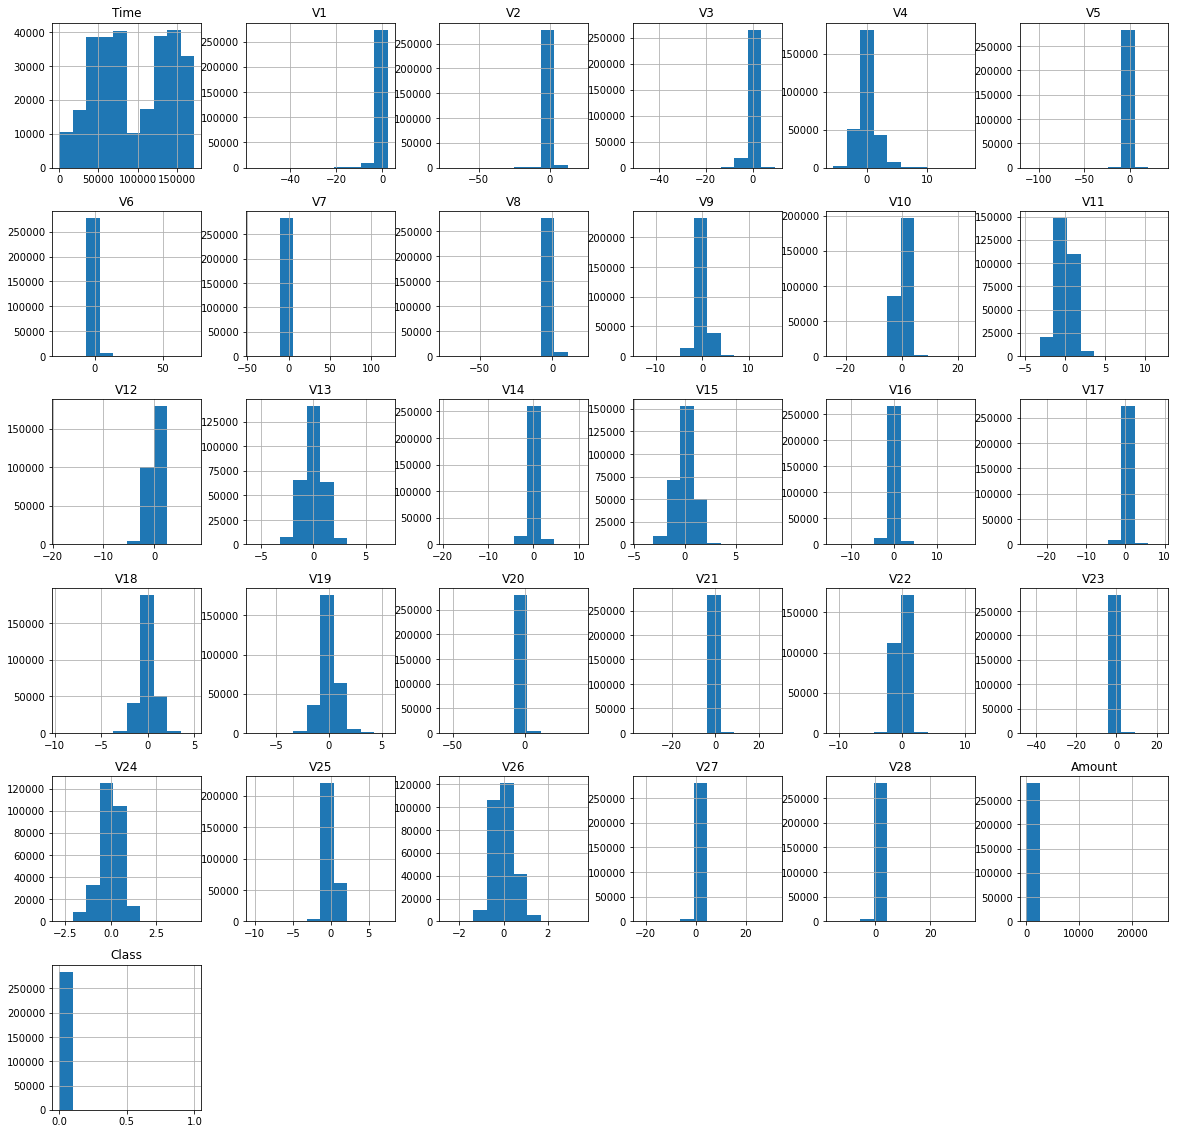

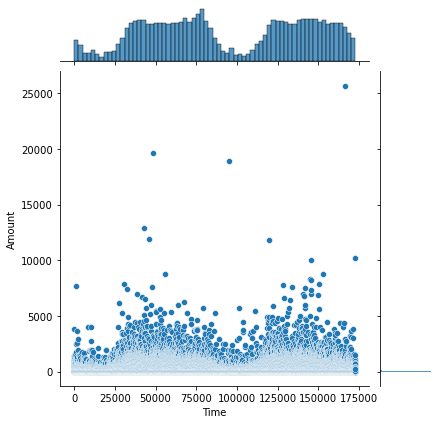

In [3]:
d=pd.read_csv(r'D:\Games\creditcard.csv')

sns.distplot(data['Amount'])

sns.distplot(data['Time'])

data.hist(figsize=(20,20))
plt.show()

sns.jointplot(x= 'Time', y= 'Amount', data= d)
d=data

In [4]:
class0 = d[d['Class']==0]

len(class0)

class1 = d[d['Class']==1]

len(class1)

class0
temp = shuffle(class0)

d1 = temp.iloc[:2000,:]

d1

frames = [d1, class1]
df_temp = pd.concat(frames)

df_temp.info()

df= shuffle(df_temp)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 187231 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    2492 non-null   float64
 1   V1      2492 non-null   float64
 2   V2      2492 non-null   float64
 3   V3      2492 non-null   float64
 4   V4      2492 non-null   float64
 5   V5      2492 non-null   float64
 6   V6      2492 non-null   float64
 7   V7      2492 non-null   float64
 8   V8      2492 non-null   float64
 9   V9      2492 non-null   float64
 10  V10     2492 non-null   float64
 11  V11     2492 non-null   float64
 12  V12     2492 non-null   float64
 13  V13     2492 non-null   float64
 14  V14     2492 non-null   float64
 15  V15     2492 non-null   float64
 16  V16     2492 non-null   float64
 17  V17     2492 non-null   float64
 18  V18     2492 non-null   float64
 19  V19     2492 non-null   float64
 20  V20     2492 non-null   float64
 21  V21     2492 non-null   float6

C:\Users\zchir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

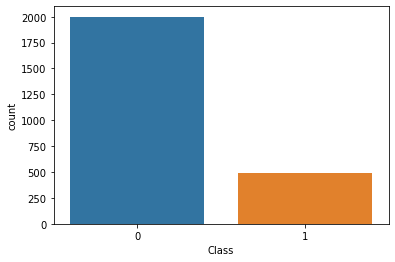

In [5]:
df.to_csv('creditcardsampling.csv')

sns.countplot('Class', data=df)

In [6]:
import imblearn

from imblearn.over_sampling import  SMOTE
oversample=SMOTE()
X=df.iloc[ : ,:-1]
Y=df.iloc[: , -1]
X,Y=oversample.fit_resample(X,Y)

X=pd.DataFrame(X)
X.shape

Y=pd.DataFrame(Y)
Y.head()

,Class
0,0
1,0
2,1
3,0
4,1


In [7]:
names=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class']

C:\Users\zchir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    4000 non-null   float64
 1   V1      4000 non-null   float64
 2   V2      4000 non-null   float64
 3   V3      4000 non-null   float64
 4   V4      4000 non-null   float64
 5   V5      4000 non-null   float64
 6   V6      4000 non-null   float64
 7   V7      4000 non-null   float64
 8   V8      4000 non-null   float64
 9   V9      4000 non-null   float64
 10  V10     4000 non-null   float64
 11  V11     4000 non-null   float64
 12  V12     4000 non-null   float64
 13  V13     4000 non-null   float64
 14  V14     4000 non-null   float64
 15  V15     4000 non-null   float64
 16  V16     4000 non-null   float64
 17  V17     4000 non-null   float64
 18  V18     4000 non-null   float64
 19  V19     4000 non-null   float64
 20  V20     4000 non-null   float64
 21  V21     4000 non-null   float64
 22  

<AxesSubplot:>

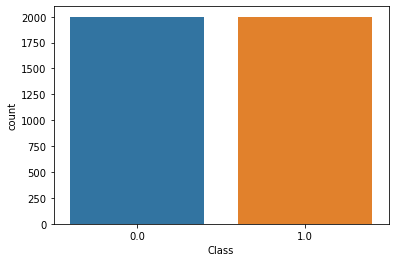

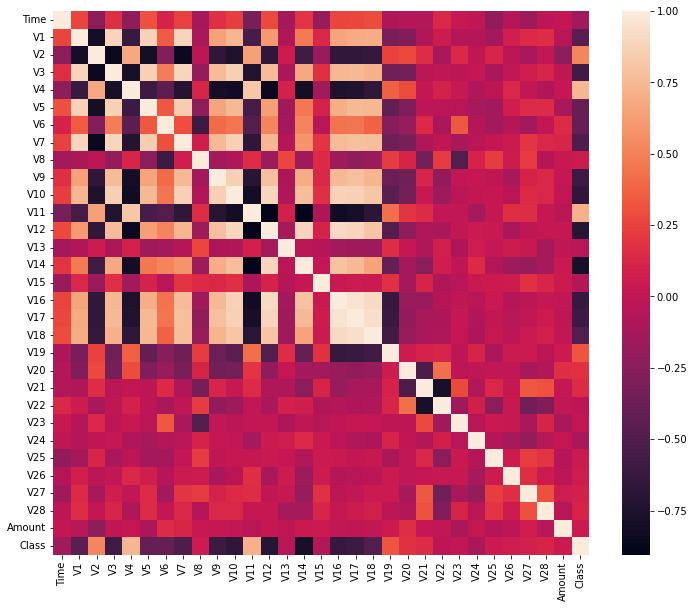

In [8]:
data=pd.concat([X,Y],axis=1)

d=data.values

data=pd.DataFrame(d,columns=names)

sns.countplot('Class', data=data)

data.describe()

data.info()

plt.figure(figsize=(12,10))
sns.heatmap(data.corr())

In [9]:
import math
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, precision_recall_curve, f1_score, auc

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data['Class'], test_size=0.3, random_state=42)

In [11]:
cols= ['V22', 'V24', 'V25', 'V26', 'V27', 'V28']

scaler = StandardScaler()

frames= ['Time', 'Amount']

x= data[frames]

d_temp = data.drop(frames, axis=1)

temp_col=scaler.fit_transform(x)

scaled_col = pd.DataFrame(temp_col, columns=frames)

scaled_col.head()

d_scaled = pd.concat([scaled_col, d_temp], axis =1)

d_scaled.head()

y = data['Class']

d_scaled.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.967452,-0.329829,-0.415129,0.889274,0.216792,-1.187343,1.791052,0.341580,1.622596,-0.283313,...,0.147967,-0.055135,0.089375,-0.742271,-0.373906,1.288032,-0.272356,-0.153598,-0.194276,0.0
1,1.586730,-0.318303,2.247934,-1.701901,-0.450163,-1.920065,-1.208505,0.929542,-1.963764,0.290442,...,-0.300491,-0.107783,0.157964,0.223858,-0.429441,-0.431648,-0.213934,0.059643,-0.040753,0.0
2,1.026378,-0.252605,0.630579,1.183631,-5.066283,2.179903,-0.703376,-0.103614,-3.490350,1.094734,...,0.357369,0.621622,0.043807,0.102711,-0.601505,0.127371,-0.163009,0.853792,0.356503,1.0
3,-1.652470,-0.364361,-1.600478,1.317447,1.639335,3.177994,-0.370568,-0.119108,-0.782518,0.917672,...,-0.169084,-0.109381,-0.479371,-0.083749,0.470623,-0.617743,-0.124995,-0.147775,-0.175944,0.0
4,0.129890,-0.224804,-13.512074,8.215177,-16.582606,6.207369,-11.318472,-2.997207,-17.640470,0.040349,...,0.694574,-0.907906,1.514028,-0.141879,0.789186,-0.031343,-0.255057,-1.865831,-0.442204,1.0


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)

X_temp_reduced = pca.fit_transform(d_scaled)

pca.explained_variance_ratio_

pca.explained_variance_

names=['Time','Amount','Transaction Method','Transaction Id','Location','Type of Card','Bank']

X_reduced= pd.DataFrame(X_temp_reduced,columns=names)
X_reduced.head()

Y=d_scaled['Class']

In [13]:
new_data=pd.concat([X_reduced,Y],axis=1)
new_data.head()
new_data.shape

new_data.to_csv('finaldata.csv')

X_train, X_test, y_train, y_test= train_test_split(X_reduced, d_scaled['Class'], test_size = 0.30, random_state = 42)

X_train.shape, X_test.shape
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
y_pred_svc

type(X_test)
X_test.to_csv('testing.csv')
from sklearn.model_selection import GridSearchCV
parameters = [ {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 1, 0.01, 0.0001 ,0.001]}]
grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

svc_param=SVC(kernel='rbf',gamma=0.01,C=100,probability=True)
svc_param.fit(X_train,y_train)



Best Accuracy: 97.29 %
Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


SVC(C=100, gamma=0.01, probability=True)

In [15]:
import pickle
# Saving model to disk
pickle.dump(svc_param, open('model.pkl','wb'))

model=pickle.load(open('model.pkl','rb'))